In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [0]:
def energy(x):
  return np.sum(np.absolute(x)**2)

def power(x):
  return np.mean(np.absolute(x)**2)

In [6]:
unit_impulse = signal.unit_impulse(21, 10).tolist()
n = np.arange(-10, 11);
print(unit_impulse)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<StemContainer object of 3 artists>

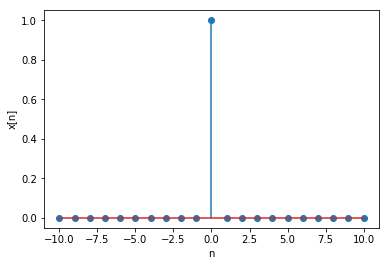

In [7]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, unit_impulse)

In [8]:
print("Energy : " + str(energy(unit_impulse)))
print("Power : " + str(power(unit_impulse)))

Energy : 1.0
Power : 0.047619047619047616


In [12]:
n = np.arange(-20, 20);
unit_step = np.heaviside(n, 1).tolist()
print(unit_step)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<StemContainer object of 3 artists>

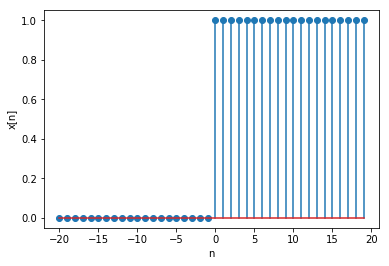

In [13]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, unit_step)

<StemContainer object of 3 artists>

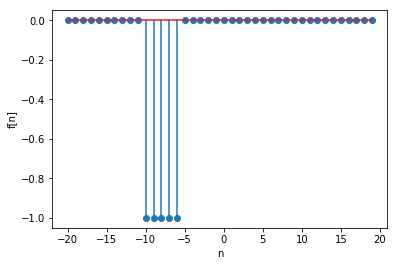

In [23]:
u4 = np.heaviside(n, 1).tolist()

for idx in range(0, 5):
  if idx+10-4 < 0:
    u4[idx+10] = 0
  else:
    u4[idx+10] = 1

fn = np.heaviside(n, 1).tolist()

for i in range(0, 40):
  fn[i] = unit_step[i] - u4[i]

plt.xlabel('n')
plt.ylabel('f[n]')
plt.stem(n, fn)

<StemContainer object of 3 artists>

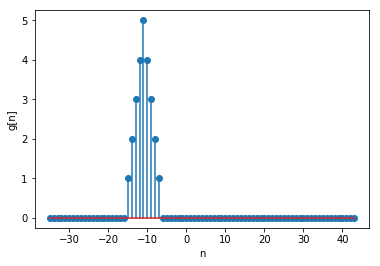

In [25]:
gn = np.convolve(fn, fn)
nn = np.arange(-35, len(gn)-35)
plt.xlabel('n')
plt.ylabel('g[n]')
plt.stem(nn, gn)

In [26]:
print("Energy : " + str(energy(unit_step)))
print("Power : " + str(power(unit_step)))

Energy : 20.0
Power : 0.5


In [0]:
ramp = []
for val in n:
  if val < 0:
    ramp.append(0)
  else:
    ramp.append(val)    

<StemContainer object of 3 artists>

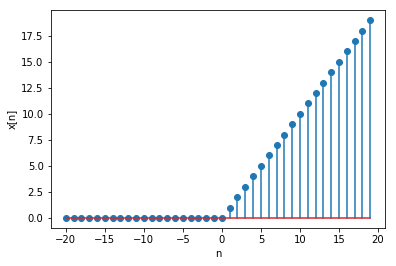

In [28]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, ramp)

In [29]:
print("Energy : " + str(energy(ramp)))
print("Power : " + str(power(ramp)))

Energy : 2470
Power : 61.75


In [0]:
exp = np.exp(n).tolist()

<StemContainer object of 3 artists>

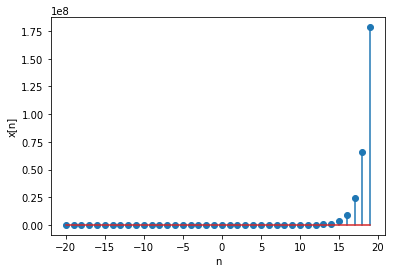

In [31]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, exp)

In [32]:
print("Energy : " + str(energy(exp)))
print("Power : " + str(power(exp)))

Energy : 3.6841947103331416e+16
Power : 921048677583285.4


In [0]:
dexp = (1/np.exp(n)).tolist()

<StemContainer object of 3 artists>

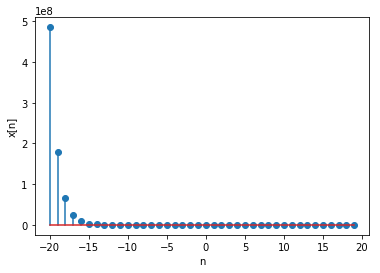

In [34]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, dexp)

In [35]:
print("Energy : " + str(energy(dexp)))
print("Power : " + str(power(dexp)))

Energy : 2.7222721394035142e+17
Power : 6805680348508786.0


<div><h3>2. Matched filter output for unit step signal.</h3>
  <p>In signal processing, a matched filter is obtained by correlating a known signal, or template, with an unknown signal to detect the presence of the template in the unknown signal.This is equivalent to convolving the unknown signal with a conjugated time-reversed version of the template. The matched filter is the optimal linear filter for maximizing the signal-to-noise ratio (SNR) in the presence of additive stochastic noise.</p>
</div>

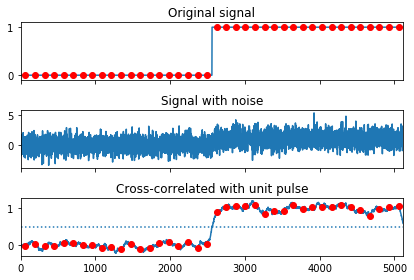

In [20]:
sig = np.repeat(unit_step, 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode = 'same') / 128
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with unit pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

<div><h3>3. Square Wave</h3></div>

(-2, 2)

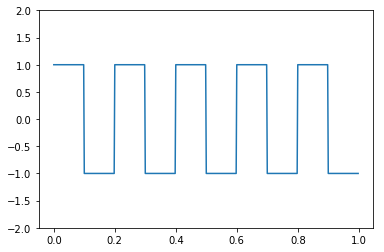

In [17]:
t = np.linspace(0, 1, 500, endpoint=False)
square_wave = signal.square(2 * np.pi * 5 * t)
plt.plot(t, square_wave)
plt.ylim(-2, 2)

In [18]:
import math
PI = 3.14

seq = []
for val in range(-100000, 100000):
  if val>=-4 and val<=4:
    seq += [math.cos(val*PI)]
  else:
    seq += [0]
  
print("energy : " + str(energy(seq)))
print("power : " + str(power(seq)))

energy : 8.999847808791007
power : 4.4999239043955034e-05


In [19]:
import math
PI = 3.14

seq = []
for val in range(0, 10000000):
  if val>=0:
    seq += [math.cos(val*PI)]
  else:
    seq += [0]
  
print("energy : " + str(energy(seq)))
print("power : " + str(power(seq)))

energy : 4999930.241412449
power : 0.49999302414124486


In [0]:
def conv(xn, hn):
    n = 6
    yn = []
    for i in range(25, 25+n):
        val = 0
        for m in range(0, n):
            val += xn[i]*hn[i-m]
        yn = yn + [val]
    return yn

In [37]:
n = np.arange(0, 51);
un = np.heaviside(n, 1).tolist()
for i in range(0, 25):
    un[i] = 0
unt = np.heaviside(n, 1).tolist()
for i in range(0, 35):
    unt[i] = 0
xn = []
for i in range(0, 51):
    xn = xn + [un[i] - unt[i]]
hn = np.zeros(51)
hn[25] = 1
hn[26] = 0
hn[27] = 0
hn[28] = 0
hn[29] = 1
yn = conv(un, hn)
print(yn)

[1.0, 1.0, 1.0, 1.0, 2.0, 2.0]


In [38]:
n = np.arange(0, 101);
unit_step = np.heaviside(n, 1).tolist()
for i in range(0, 50):
    unit_step[i] = 0
print(unit_step)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<StemContainer object of 3 artists>

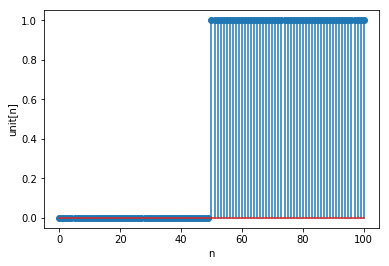

In [39]:
plt.xlabel('n')
plt.ylabel('unit[n]')
plt.stem(n, unit_step)

In [40]:
unt = np.heaviside(n, 1).tolist()
for i in range(70):
    unt[i] = 0
print(unt)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<StemContainer object of 3 artists>

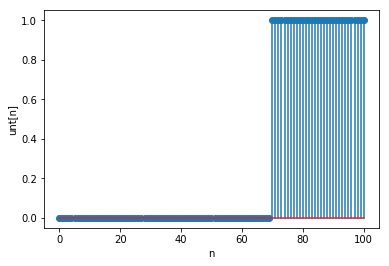

In [41]:
plt.xlabel('n')
plt.ylabel('unt[n]')
plt.stem(n, unt)

In [42]:
fun = []
for i in range(101):
    fun = fun + [unit_step[i] - unt[i]]
print(fun)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<StemContainer object of 3 artists>

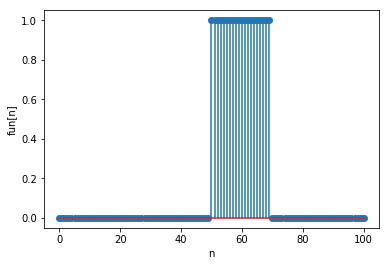

In [43]:
plt.xlabel('n')
plt.ylabel('fun[n]')
plt.stem(n, fun)

In [44]:
xn = []
for i in range(101):
    xn = xn + [(0.8**i)*fun[i]]
print(xn)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4272476927059638e-05, 1.1417981541647711e-05, 9.13438523331817e-06, 7.307508186654536e-06, 5.846006549323629e-06, 4.676805239458904e-06, 3.741444191567123e-06, 2.9931553532536988e-06, 2.394524282602959e-06, 1.9156194260823675e-06, 1.532495540865894e-06, 1.2259964326927152e-06, 9.807971461541723e-07, 7.846377169233378e-07, 6.277101735386703e-07, 5.021681388309362e-07, 4.0173451106474904e-07, 3.2138760885179925e-07, 2.571100870814394e-07, 2.0568806966515154e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<StemContainer object of 3 artists>

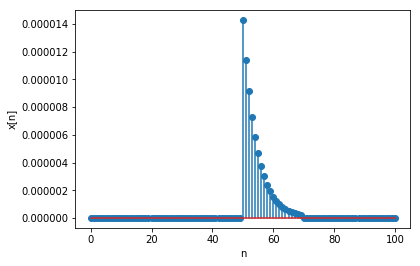

In [45]:
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, xn)

In [46]:
xneg = []
for i in range(100, -1, -1):
    xneg = xneg + [xn[i]]
print(xneg)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0568806966515154e-07, 2.571100870814394e-07, 3.2138760885179925e-07, 4.0173451106474904e-07, 5.021681388309362e-07, 6.277101735386703e-07, 7.846377169233378e-07, 9.807971461541723e-07, 1.2259964326927152e-06, 1.532495540865894e-06, 1.9156194260823675e-06, 2.394524282602959e-06, 2.9931553532536988e-06, 3.741444191567123e-06, 4.676805239458904e-06, 5.846006549323629e-06, 7.307508186654536e-06, 9.13438523331817e-06, 1.1417981541647711e-05, 1.4272476927059638e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<StemContainer object of 3 artists>

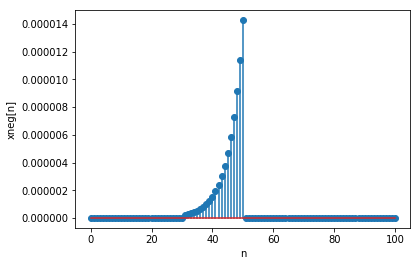

In [47]:
plt.xlabel('n')
plt.ylabel('xneg[n]')
plt.stem(n, xneg)

In [48]:
xe = []
for i in range(101):
    xe = xe + [(xn[i] + xneg[i])/2]
print(xe)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0284403483257577e-07, 1.285550435407197e-07, 1.6069380442589963e-07, 2.0086725553237452e-07, 2.510840694154681e-07, 3.1385508676933514e-07, 3.923188584616689e-07, 4.903985730770861e-07, 6.129982163463576e-07, 7.66247770432947e-07, 9.578097130411837e-07, 1.1972621413014795e-06, 1.4965776766268494e-06, 1.8707220957835615e-06, 2.338402619729452e-06, 2.9230032746618144e-06, 3.653754093327268e-06, 4.567192616659085e-06, 5.708990770823856e-06, 1.4272476927059638e-05, 5.708990770823856e-06, 4.567192616659085e-06, 3.653754093327268e-06, 2.9230032746618144e-06, 2.338402619729452e-06, 1.8707220957835615e-06, 1.4965776766268494e-06, 1.1972621413014795e-06, 9.578097130411837e-07, 7.66247770432947e-07, 6.129982163463576e-07, 4.903985730770861e-07, 3.923188584616689e-07, 3.1385508676933514e-07, 2.510840694154681e-07, 2.0086725553237452e-07, 1.6

<StemContainer object of 3 artists>

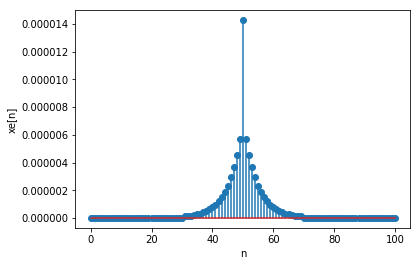

In [49]:
plt.xlabel('n')
plt.ylabel('xe[n]')
plt.stem(n, xe)

In [50]:
xo = []
for i in range(101):
    xo = xo + [(xn[i] - xneg[i])/2]
print(xo)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0284403483257577e-07, -1.285550435407197e-07, -1.6069380442589963e-07, -2.0086725553237452e-07, -2.510840694154681e-07, -3.1385508676933514e-07, -3.923188584616689e-07, -4.903985730770861e-07, -6.129982163463576e-07, -7.66247770432947e-07, -9.578097130411837e-07, -1.1972621413014795e-06, -1.4965776766268494e-06, -1.8707220957835615e-06, -2.338402619729452e-06, -2.9230032746618144e-06, -3.653754093327268e-06, -4.567192616659085e-06, -5.708990770823856e-06, 0.0, 5.708990770823856e-06, 4.567192616659085e-06, 3.653754093327268e-06, 2.9230032746618144e-06, 2.338402619729452e-06, 1.8707220957835615e-06, 1.4965776766268494e-06, 1.1972621413014795e-06, 9.578097130411837e-07, 7.66247770432947e-07, 6.129982163463576e-07, 4.903985730770861e-07, 3.923188584616689e-07, 3.1385508676933514e-07, 2.510840694154681e-07, 2.0086725553237452e-07, 1.6

<StemContainer object of 3 artists>

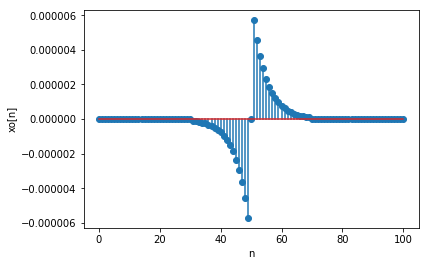

In [51]:
plt.xlabel('n')
plt.ylabel('xo[n]')
plt.stem(n, xo)